# Process our dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import FreqDist
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
test_corpus = pd.read_csv('extractData.csv')

In [4]:
metalMusic = test_corpus.where(test_corpus['genre']=='Metal').dropna()
HipMusic = test_corpus.where(test_corpus['genre']=='Hip-Hop').dropna()

In [5]:
t= [metalMusic,HipMusic]
used_for_test = pd.concat(t)
used_for_test.drop(columns = ['Unnamed: 0']) 

,genre,lyrics,class
0,Metal,"Gods Of The Mountains\r\nSky, Forest And Seas\...",0.0
1,Metal,Rise gods of the fierous black burning skies\r...,0.0
2,Metal,A Dying Skyline Cold From Wind And Rain\r\nAut...,0.0
3,Metal,Fiends of the gods to war we ride\r\nOver the ...,0.0
4,Metal,Cold Is The Winter\r\nOn Its Ground We Ride\r\...,0.0
5,Metal,[Instrumental],0.0
6,Metal,Over the mountains again\r\nWandering above th...,0.0
7,Metal,Dethroned Worlds On Fire Under The Ice\r\nAll ...,0.0
8,Metal,Once shadows called I saddled my horse\r\nTo t...,0.0
9,Metal,I rode for the moments once under red sky\r\nB...,0.0


In [10]:
#Extract lyrics content and get their genres labels
lyrics = used_for_test.loc[:,'lyrics']
genres = used_for_test.loc[:,'class']

In [11]:
#Transfer lyrics and genres to list type
lyricsContent = lyrics.values.tolist()
genres = genres.values.tolist()
lyricsContent

['Gods Of The Mountains\r\nSky, Forest And Seas\r\nLands Of Fire, Ice And The Northern Deeps\r\nCold As A Storm From The Raging Sea\r\nSoon Their Winds To Rise\r\nGods Of The Mountains\r\nSky, Forest And Seas\r\nLands Of Fire, Ice And The Northern Deeps\r\nCold As A Storm From The Raging Sea\r\nSoon Their Winds To Rise',
 'Rise gods of the fierous black burning skies\r\nRaise hammers spears and swords high on your ride\r\nAlong the great legends born of fire and ice\r\nWarriors on horses attack from the mountainous sides\r\nFires shall flame to the skies all battalions stride\r\nAlliances stand line by line\r\nHordes of men armoured to die\r\nFight warriors of norse while death glances in your eyes\r\nSwing axes and blades unto the final ride\r\nAttrition holds forces under the great fires\r\nNow heathenous shall be the victors with swords forged by fire\r\nA warcry shall echo the rise\r\nLoud from the fierce mountainside\r\nAll set their lives on the line\r\nTo death which is for you 

In [12]:
# process the lyrics content
afterReplace = []
for i in lyricsContent :
    h = i.replace('\n',' ').replace('[',',').replace(']',',').replace('\\','')
    afterReplace.append(h)

In [13]:
# split training dataset and testing dataset
train_lyrics, test_lyrics, train_genres, test_genres = train_test_split(afterReplace,
                                                                        genres,
                                                                        test_size=0.3)

# Prepare feature for ML

In [14]:
#bow features
from sklearn.feature_extraction.text import CountVectorizer #tokenizes and counts words

# build bag of words features' vectorizer and get features
bow_vectorizer=CountVectorizer(min_df=1, ngram_range=(1,1))
bow_train_features = bow_vectorizer.fit_transform(train_lyrics)
bow_test_features = bow_vectorizer.transform(test_lyrics) 

In [15]:
# tfidf features
from sklearn.feature_extraction.text import TfidfVectorizer #alternatively, use TfidfTransformer()

tfidf_vectorizer=TfidfVectorizer(min_df=1, 
                                norm='l2',
                                smooth_idf=True,
                                use_idf=True,
                                ngram_range=(1,1))
tfidf_train_features = tfidf_vectorizer.fit_transform(train_lyrics)  
tfidf_test_features = tfidf_vectorizer.transform(test_lyrics)    

In [16]:
import gensim 
#tokenize documents for word2vec
tokenized_train = [nltk.word_tokenize(text)
                  for text in train_lyrics]
tokenized_test = [nltk.word_tokenize(text)
                  for text in test_lyrics]  
#build word2vec model                   
wv_model = gensim.models.Word2Vec(tokenized_train,
                              size=200,                          #set the size or dimension for the word vectors 
                              window=60,                        #specify the length of the window of words taken as context
                              min_count=10)                   #ignores all words with total frequency lower than  

In [17]:
def average_word_vectors(words, model, vocabulary, num_features):
  
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
   
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
   
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
       
    return feature_vector 
  
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    # model.wv.index2word (a kind of method to extract word vector library and put them in a list) (方法是提取词向量词典 以List的方式)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                   for tokenized_sentence in corpus]
    return np.array(features)

In [18]:
# averaged word vector features from word2vec
avg_wv_train_features = averaged_word_vectorizer(corpus=tokenized_train,
                                                model=wv_model,
                                                num_features=200)                   
avg_wv_test_features = averaged_word_vectorizer(corpus=tokenized_test,
                                               model=wv_model,
                                               num_features=200) 

# Define metric for evaluation

In [19]:
from sklearn import metrics

# define a function to evaluate our classification models based on four metrics
def get_metrics(true_labels, predicted_labels):
    
    print ('Accuracy:', np.round(                                                    
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels),
                        2))
    print ('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels),
                        2))
                        

In [20]:
# define a function that trains the model, performs predictions and evaluates the predictions
def train_predict_evaluate_model(classifier, 
                                 train_features, train_labels, 
                                 test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features)
    predict_for_train = classifier.predict(train_features)
    print ('Train Model Accuracy:', np.round(metrics.accuracy_score(train_labels, predict_for_train),2))
    # evaluate model prediction performance
    get_metrics(true_labels=test_labels, #the function we defined above(上面定义的函数)
                predicted_labels=predictions)
    return predictions    

# Train and Evaluate with bow features

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
mnb = MultinomialNB()
svm = SGDClassifier(loss='hinge', max_iter=100)
RFC= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=4, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0,
        min_samples_leaf=5, min_samples_split=2,
        min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
LR= LogisticRegression(random_state=1)

In [22]:
# Multinomial Naive Bayes with bag of words features
print('The 4 kind of evaluation score of MNB model is following:')
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=bow_train_features,
                                           train_labels=train_genres,
                                           test_features=bow_test_features,
                                           test_labels=test_genres)
#Support Vector Machine with bag of words features
print('The 4 kind of evaluation score of SVM model is following:')
svm_bow_predictions = train_predict_evaluate_model(classifier=svm,
                                           train_features=bow_train_features,
                                           train_labels=train_genres,
                                           test_features=bow_test_features,
                                           test_labels=test_genres)
#Logistic Regression Classifier with bag of words features
print('The 4 kind of evaluation score of Logistic Regression model is following:')
lr_bow_predictions = train_predict_evaluate_model(classifier=LR,
                                           train_features=bow_train_features,
                                           train_labels=train_genres,
                                           test_features=bow_test_features,
                                           test_labels=test_genres)

The 4 kind of evaluation score of MNB model is following:
Train Model Accuracy: 0.92
Accuracy: 0.9
Precision: 0.87
Recall: 0.92
F1 Score: 0.9
The 4 kind of evaluation score of SVM model is following:
Train Model Accuracy: 1.0
Accuracy: 0.91
Precision: 0.89
Recall: 0.93
F1 Score: 0.91
The 4 kind of evaluation score of Logistic Regression model is following:
Train Model Accuracy: 1.0
Accuracy: 0.91
Precision: 0.93
Recall: 0.89
F1 Score: 0.91


# Train and evaluate with tfidf features

In [23]:
# Multinomial Naive Bayes with tfidf features
print('The 4 kind of evaluation score of MNB model is following:')
mnb_tfidf_predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=tfidf_train_features,
                                           train_labels=train_genres,
                                           test_features=tfidf_test_features,
                                           test_labels=test_genres)
#Support Vector Machine with bag of tfidf features
print('The 4 kind of evaluation score of SVM model is following:')
svm_tfidf_predictions = train_predict_evaluate_model(classifier=svm,
                                           train_features=tfidf_train_features,
                                           train_labels=train_genres,
                                           test_features=tfidf_test_features,
                                           test_labels=test_genres)
#Logistic Regression Classifier with tfidf features
print('The 4 kind of evaluation score of Logistic Regression model is following:')
lr_tfidf_predictions = train_predict_evaluate_model(classifier=LR,
                                           train_features=tfidf_train_features,
                                           train_labels=train_genres,
                                           test_features=tfidf_test_features,
                                           test_labels=test_genres)

The 4 kind of evaluation score of MNB model is following:
Train Model Accuracy: 0.9
Accuracy: 0.86
Precision: 0.79
Recall: 0.96
F1 Score: 0.87
The 4 kind of evaluation score of SVM model is following:
Train Model Accuracy: 1.0
Accuracy: 0.92
Precision: 0.92
Recall: 0.91
F1 Score: 0.92
The 4 kind of evaluation score of Logistic Regression model is following:
Train Model Accuracy: 0.94
Accuracy: 0.91
Precision: 0.91
Recall: 0.9
F1 Score: 0.91


# Train and evaluate with word2vec features

In [24]:
#Support Vector Machine with word2vec features
print('The 4 kind of evaluation score of SVM model is following:')
svm_avg_wv_predictions = train_predict_evaluate_model(classifier=svm,
                                           train_features=avg_wv_train_features,
                                           train_labels=train_genres,
                                           test_features=avg_wv_test_features,
                                           test_labels=test_genres)
#Random Forest Classifier with word2vec features
print('The 4 kind of evaluation score of Random Forest model is following:')
rfc_avg_wv_predictions = train_predict_evaluate_model(classifier=RFC,
                                           train_features=avg_wv_train_features,
                                           train_labels=train_genres,
                                           test_features=avg_wv_test_features,
                                           test_labels=test_genres)
#Logistic Regression Classifier with word2vec features
print('The 4 kind of evaluation score of Logistic Regression model is following:')
lr_avg_wv_predictions = train_predict_evaluate_model(classifier=LR,
                                           train_features=avg_wv_train_features,
                                           train_labels=train_genres,
                                           test_features=avg_wv_test_features,
                                           test_labels=test_genres)

The 4 kind of evaluation score of SVM model is following:
Train Model Accuracy: 0.89
Accuracy: 0.87
Precision: 0.82
Recall: 0.94
F1 Score: 0.87
The 4 kind of evaluation score of Random Forest model is following:
Train Model Accuracy: 0.92
Accuracy: 0.89
Precision: 0.86
Recall: 0.92
F1 Score: 0.89
The 4 kind of evaluation score of Logistic Regression model is following:
Train Model Accuracy: 0.91
Accuracy: 0.9
Precision: 0.88
Recall: 0.91
F1 Score: 0.89


# Ensemble Model

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
clf1 = LR= LogisticRegression(random_state=1)
clf2 = svc = SVC(C=5, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.0001, 
          cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
          random_state=None)
clf3 = mnb = MultinomialNB()
clf4 = RFC= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=4, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0,
        min_samples_leaf=5, min_samples_split=2,
        min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
eclf = VotingClassifier(estimators=[('lr', clf1),('svc', clf2),('RFC',clf4)], voting='soft')
eclf2 = VotingClassifier(estimators=[('lr',clf1),('svc',clf2), ('mnb',clf3)], voting='soft')
# ensemble model with bow features
ensenmble_bow_predictions = train_predict_evaluate_model(classifier=eclf2,
                                           train_features=bow_train_features,
                                           train_labels=train_genres,
                                           test_features=bow_test_features,
                                           test_labels=test_genres)

Train Model Accuracy: 0.96
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_genres,ensenmble_bow_predictions)
pd.DataFrame(cm, index=['Metal','Hip-Hop'], columns=['Metal','Hip-Hop']) 
#tn, fp, fn, tp = cm.ravel()

,Metal,Hip-Hop
Metal,585,46
Hip-Hop,47,522


In [27]:
# ensemble model with tfidf features
ensenmble_tfidf_predictions = train_predict_evaluate_model(classifier=eclf2,
                                           train_features=tfidf_train_features,
                                           train_labels=train_genres,
                                           test_features=tfidf_test_features,
                                           test_labels=test_genres)

Train Model Accuracy: 0.91
Accuracy: 0.89
Precision: 0.87
Recall: 0.91
F1 Score: 0.89


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_genres,ensenmble_tfidf_predictions)
pd.DataFrame(cm, index=['Metal','Hip-Hop'], columns=['Metal','Hip-Hop']) 
#tn, fp, fn, tp = cm.ravel()

,Metal,Hip-Hop
Metal,556,75
Hip-Hop,52,517


In [29]:
# ensemble model with word2vec features
ensenmble_avg_wv_predictions = train_predict_evaluate_model(classifier=eclf,
                                           train_features=avg_wv_train_features,
                                           train_labels=train_genres,
                                           test_features=avg_wv_test_features,
                                           test_labels=test_genres)

Train Model Accuracy: 0.92
Accuracy: 0.9
Precision: 0.88
Recall: 0.92
F1 Score: 0.9


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_genres,ensenmble_avg_wv_predictions)
pd.DataFrame(cm, index=['Metal','Hip-Hop'], columns=['Metal','Hip-Hop']) 
#tn, fp, fn, tp = cm.ravel()

,Metal,Hip-Hop
Metal,561,70
Hip-Hop,45,524


# ROC Curve of Ensemble Model with Different Features

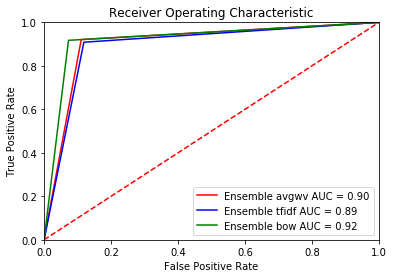

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def roc_curve_draw(true_labels_para,predict_labels_para,line_color,line_label):
    actual = true_labels_para
    predictions = predict_labels_para
    false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, color=line_color,label=line_label+' '+'AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')

roc_curve_draw(test_genres,ensenmble_avg_wv_predictions,line_color='red', line_label='Ensemble avgwv')
roc_curve_draw(test_genres,ensenmble_tfidf_predictions,line_color='blue', line_label='Ensemble tfidf')
roc_curve_draw(test_genres,ensenmble_bow_predictions,line_color='green',line_label='Ensemble bow')

plt.title('Receiver Operating Characteristic')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LDA Model Result

In [33]:
#remove stop words, to lowercase and tokenize
from nltk.corpus import stopwords
mystopwords = stopwords.words('english')

tokens_list = [[word for word in review.lower().split(' ') if word not in mystopwords and word.isalpha()]
         for review in afterReplace]

#remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)

for tokens in tokens_list:
    for token in tokens:
        frequency[token] += 1
        
tokens_list = [[token for token in tokens if frequency[token]>1]
              for tokens in tokens_list]

In [34]:
from gensim import corpora,models
from gensim.models import LdaModel, LsiModel
# generate token dictionary class
dictionary = corpora.Dictionary(tokens_list) 
# generate a unique token list 
sort_token = sorted(dictionary.items(),key=lambda k:k[0], reverse = False)
unique_token = [token for (ID,token) in sort_token]
# build a corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]
# Save a Term Document Matrix
matrix = gensim.matutils.corpus2dense(corpus,num_terms=len(dictionary),dtype = 'int')
matrix = matrix.T #transpose the matrix 
#convert the numpy matrix into pandas data frame
matrix_df = pd.DataFrame(matrix, columns=unique_token)

In [37]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10) #fit lda model
lda.print_topics(5)

[(1,
  '0.031*"like" + 0.019*"never" + 0.013*"got" + 0.011*"one" + 0.009*"take" + 0.007*"want" + 0.007*"feel" + 0.007*"get" + 0.006*"know" + 0.005*"im"'),
 (4,
  '0.019*"got" + 0.018*"want" + 0.018*"come" + 0.015*"like" + 0.012*"u" + 0.010*"get" + 0.010*"pussy" + 0.010*"back" + 0.009*"du" + 0.008*"go"'),
 (9,
  '0.027*"got" + 0.024*"know" + 0.024*"get" + 0.020*"like" + 0.013*"ich" + 0.013*"love" + 0.012*"see" + 0.012*"make" + 0.010*"wanna" + 0.010*"come"'),
 (7,
  '0.029*"ya" + 0.023*"la" + 0.014*"de" + 0.013*"yo" + 0.010*"got" + 0.010*"que" + 0.009*"know" + 0.009*"se" + 0.009*"bitch" + 0.009*"plus"'),
 (2,
  '0.048*"get" + 0.025*"like" + 0.019*"shit" + 0.018*"want" + 0.018*"got" + 0.017*"know" + 0.012*"see" + 0.012*"fuck" + 0.009*"make" + 0.009*"say"')]

In [41]:
# Generate U Matrix for LDA model
corpus_lda = lda[corpus] #transform lda model

#convert corpus_lda to numpy matrix
U_matrix_lda = gensim.matutils.corpus2dense(corpus_lda,num_terms=15).T

#write U_matrix into pandas dataframe and output
U_matrix_lda_df = pd.DataFrame(U_matrix_lda)
#print (matrix_df.shape)
#print (U_matrix_lda_df.shape)

In [42]:
# split training dataset and testing dataset
train, test, train_g, test_g = train_test_split(U_matrix_lda_df,genres,test_size=0.3)

In [43]:
for model in [mnb,RFC,LR,svc,eclf]:
    model.fit(train,train_g)
    predictions = model.predict(train)
    bow_predictions = train_predict_evaluate_model(classifier=model,
                                           train_features=train,
                                           train_labels=train_g,
                                           test_features=test,
                                           test_labels=test_g)

Train Model Accuracy: 0.81
Accuracy: 0.81
Precision: 0.79
Recall: 0.84
F1 Score: 0.81
Train Model Accuracy: 0.9
Accuracy: 0.89
Precision: 0.91
Recall: 0.87
F1 Score: 0.89
Train Model Accuracy: 0.85
Accuracy: 0.84
Precision: 0.85
Recall: 0.81
F1 Score: 0.83
Train Model Accuracy: 0.86
Accuracy: 0.85
Precision: 0.85
Recall: 0.84
F1 Score: 0.85
Train Model Accuracy: 0.88
Accuracy: 0.87
Precision: 0.87
Recall: 0.85
F1 Score: 0.86


# Model Selection

In [44]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [45]:
scores1 = cross_val_score(LR,avg_wv_test_features, test_genres, cv=10, scoring='accuracy')
scores2 = cross_val_score(LR,bow_test_features, test_genres, cv=10, scoring='accuracy')
scores3 = cross_val_score(LR,tfidf_test_features, test_genres, cv=10, scoring='accuracy')
print(scores1.mean())
print(scores2.mean())
print(scores3.mean())

0.8991932888858022
0.8867001759381438
0.890818170243304


In [46]:
#test ensemble model in order to make comparison(我电脑CPU不行跑不出结果，你们可以试试看，跑不出来就算了不做了)
scores4 = cross_val_score(eclf,avg_wv_test_features, test_genres, cv=5, scoring='accuracy')
scores5 = cross_val_score(eclf,bow_test_features, test_genres, cv=5, scoring='accuracy')
scores6 = cross_val_score(eclf,tfidf_test_features, test_genres, cv=5, scoring='accuracy')
print(scores4.mean())
print(scores5.mean())
print(scores6.mean())

0.9008187497468126
0.9058398149273424
0.8757630774839841
